<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
# Это надо для загрузки с google drive

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/test.csv')

#data = pd.read_csv('./train.csv')

In [5]:
train.shape, test.shape

((5282, 20), (1761, 19))

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5058,13,78.75,995.35,Female,0,No,No,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
703,72,116.80,8456.75,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
489,17,102.55,1742.5,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
582,1,19.95,19.95,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,1
2912,5,94.45,498.1,Male,0,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [8]:
# значения nan отсутствуют

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [10]:
# Посмотрим сводку по фичам типа object. Видно, что в TotalSpent что-то не так - в топе пустое значение, хотя 'NAN'ов не было

train.describe(include = 'object')

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [11]:
test.describe(include = 'object')

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761
unique,1710,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,19.55,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,4,900,936,1257,1600,879,755,886,756,778,869,711,704,955,1023,579


In [12]:
# видим, что затесался пробел. Надо бы его заменить и привести фичу к типу float

train.TotalSpent.value_counts().index

Index([' ', '20.2', '19.75', '20.05', '19.65', '19.9', '45.3', '20.15', '75.3',
       '19.45',
       ...
       '3121.45', '741.4', '475.7', '3616.25', '257', '4113.7', '2861.45',
       '7386.05', '1258.3', '197.7'],
      dtype='object', length=4978)

In [13]:
# поменяем пробелы на nan и приведем TotalSpent к типу float (сразу и в тесте тоже)

train.TotalSpent = train.TotalSpent.replace(' ', np.nan)
test.TotalSpent = test.TotalSpent.replace(' ', np.nan)

train.TotalSpent = train.TotalSpent.astype(float)
test.TotalSpent = test.TotalSpent.astype(float)


In [14]:
# Оценим масштаб числовых признаков... Очевидно, для линейных и метрических алгоритмов необходимо будет масштабировать данные

train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5273.000000
mean,32.397009,64.924754,2291.390461
std,24.550326,30.176464,2269.014233
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.100000
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3807.350000
max,72.000000,118.750000,8684.800000


In [15]:
# Посмотрим, куда попали nan в TotalSpent
# что делать с пропусками решим позже

print('nan значений в train: ', train['TotalSpent'].isna().sum())
print('nan значений в test: ', test['TotalSpent'].isna().sum())

nan значений в train:  9
nan значений в test:  2


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

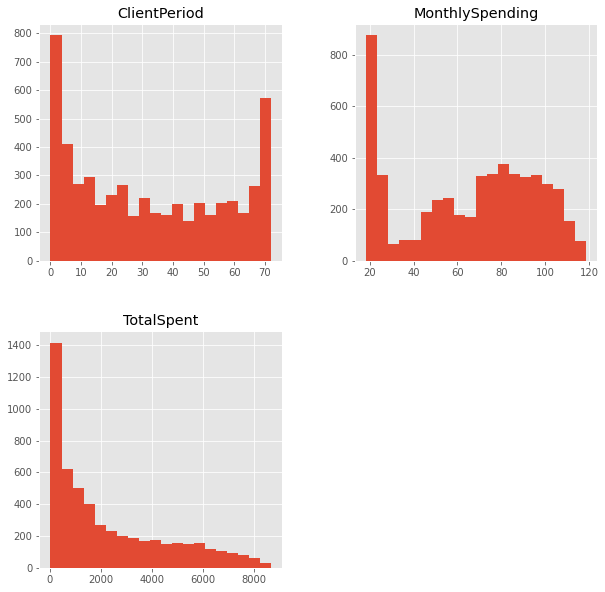

In [16]:
# гистограммы численных признаков
train[num_cols].hist(figsize = (10, 10), density = False, bins=20);

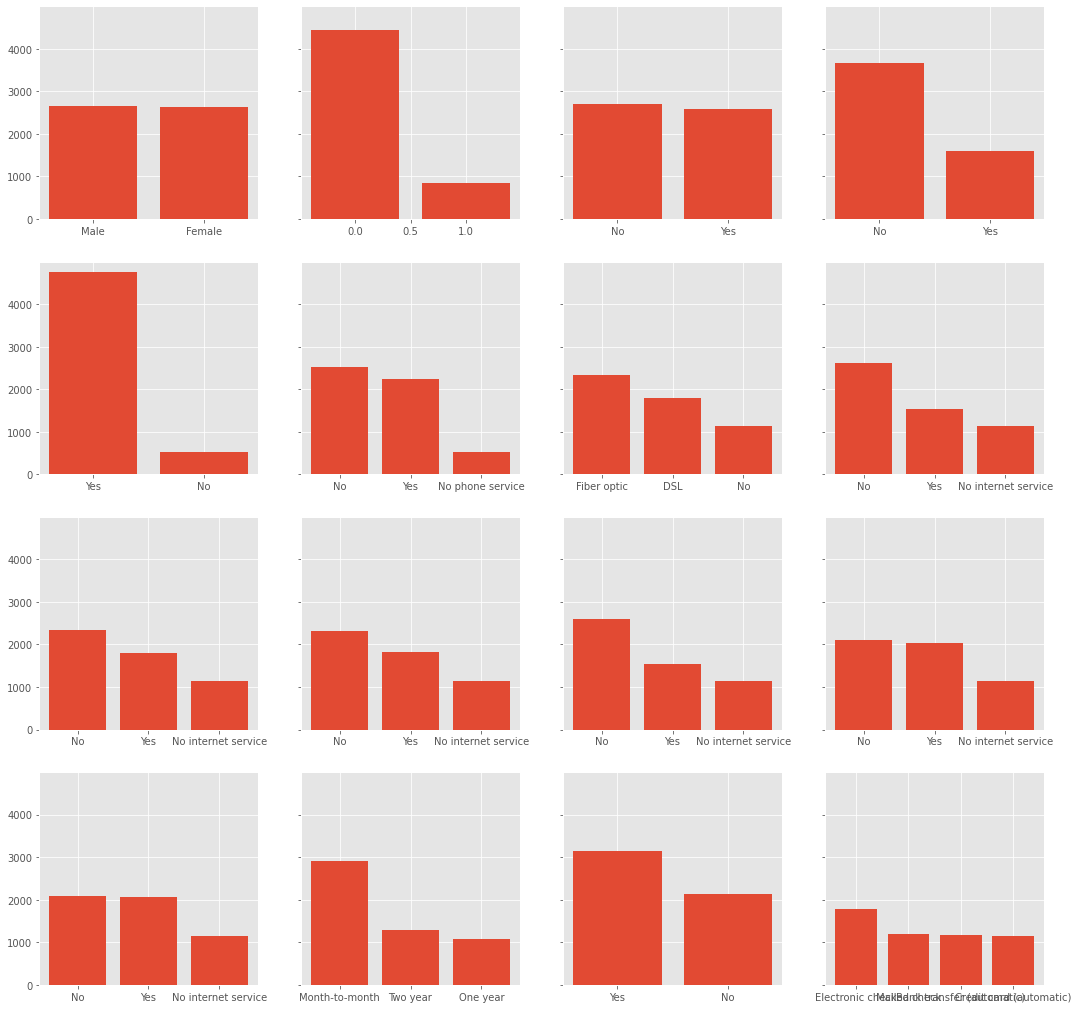

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(18, 18), sharey=True)
for i in range(len(cat_cols)):
    values = train[cat_cols[i]].value_counts()
    axes[i//4, i%4].bar(values.index, values)

    #sns.countplot(x=cat_cols[i], data=train, ax=axes[i//4, i%4]) # <-- это будет посимпатичнее, но раз в задании написано value_counts + bar... 


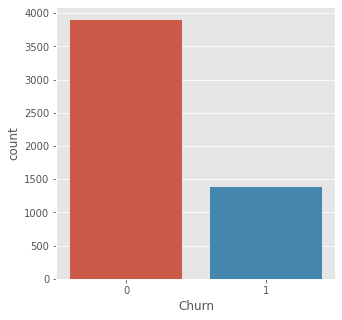

In [18]:
# Распределение целевой переменной - видно, что классы необходимо балансировать
plt.figure(figsize=(5, 5))
sns.countplot(train.Churn);

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

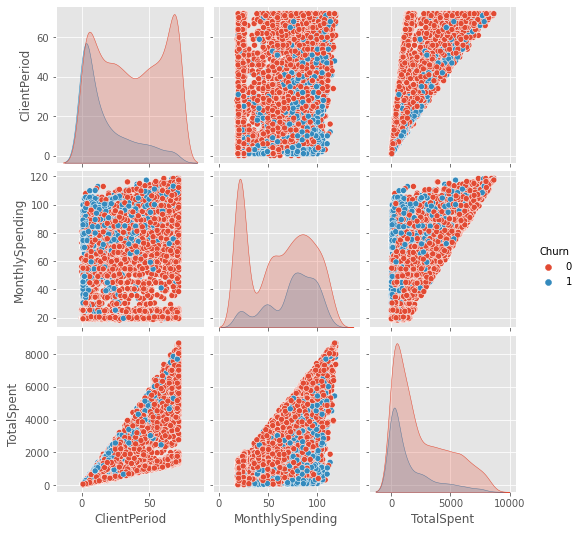

In [19]:
# поищем попарные зависимости в данных
sns.pairplot(train[num_cols].join(train.Churn), hue = 'Churn')


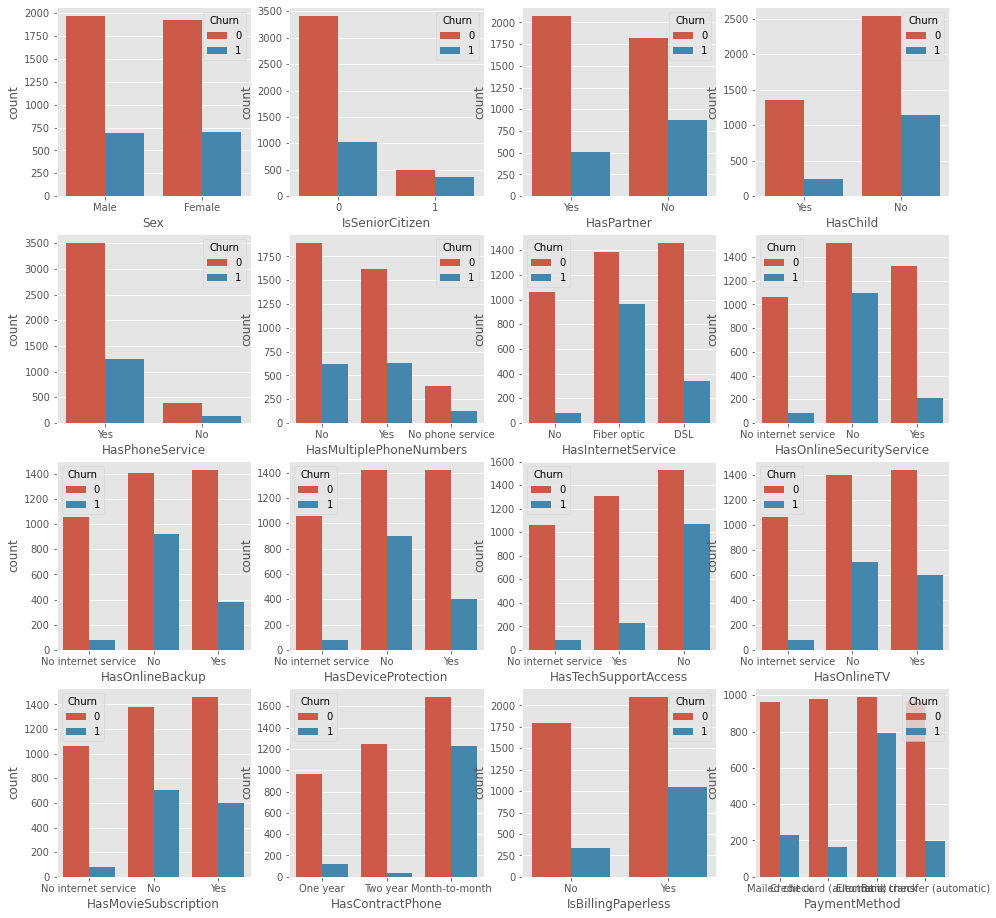

In [20]:
fig, axes = plt.subplots(4,4, figsize=(16, 16))
for i in range(len(cat_cols)):
    sns.countplot(x=cat_cols[i], data=train[cat_cols].join(train.Churn), ax=axes[i//4, i%4], hue="Churn")

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

## Baseline

Предварительно напишем банальный короткий baseline, чтобы далее было, с чем сравнивать на валидации и сабмите.

Выбросим наны из трейна и заменим на 0 - в тесте.
Сбалансируем классы и оценим скор на кросс-валидации c 5 фолдами на 4 сидах.


In [22]:
def baselineCV(estimator, X, y, seeds = 4):
  score = []
  for i in range(seeds):
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    score.append(cross_val_score(estimator = estimator, X=X, y=y, cv=fold, scoring='roc_auc').mean())

  return np.mean(score)

In [23]:
train = train.dropna()
test.TotalSpent = test.TotalSpent.fillna(0)

train_num = train[num_cols]
test_num = test[num_cols]
y = train.Churn.astype(int)

lr = LogisticRegression(class_weight='balanced')
print('CV baseline score: ', baselineCV(lr, train_num, y))

CV baseline score:  0.8050011093215744


In [24]:
# засабмитим...

lr = LogisticRegression(class_weight='balanced').fit(train_num, y)
base_pred = lr.predict_proba(test_num)[:,1]

subm = pd.DataFrame({'ID': test.index, 'Churn': base_pred})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/log_reg_test1.csv', index=False)

#### baseline public score = 0.81720

### Добавим в baseline OHE на кат.признаках и масштабируем


In [25]:
# разделим датасеты по типам признаков

train_cat = train[cat_cols]
test_cat = test[cat_cols]

In [26]:
# трансформируем кат. признаки через OHE и объединяем с числовыми

train_test_dummies = pd.get_dummies(pd.concat([train_cat, test_cat], axis=0), drop_first=True)

X_train = pd.concat([train_num, train_test_dummies.iloc[:len(train)]], axis=1)
X_test = pd.concat([test_num, train_test_dummies.iloc[len(train):]], axis=1)

X_test

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.85,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,29,98.50,3004.15,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,9,76.25,684.85,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,67,74.00,4868.40,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,71,20.10,1389.60,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0
1757,13,20.85,272.35,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1758,2,91.45,171.45,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1759,19,89.10,1620.80,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [27]:
# ... и, наконец, масштабируем, а заодно потестим разные скейлеры

Standard_LogR = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', random_state = 0))

Robust_LogR = make_pipeline(
    RobustScaler(),
    LogisticRegression(class_weight='balanced', random_state = 0))

In [28]:
# оценим baseline по той же кросс-валидации, но с полученными данными

print('Standart_scaler BaselineCV: ', baselineCV(Standard_LogR, X_train, y))
print('  Robust_scaler BaselineCV: ', baselineCV(Robust_LogR, X_train, y))

Standart_scaler BaselineCV:  0.8447575284587892
  Robust_scaler BaselineCV:  0.8445874491904987


In [29]:
# засабмитим StandartScaler, хотя разница вполне может быть статистически незначима(можно проверить, но мы сразу возьмем то, что побольше)

lr = Standard_LogR.fit(X_train, y)
base_sscale_pred = lr.predict_proba(X_test)[:,1]

subm = pd.DataFrame({'ID': test.index, 'Churn': base_sscale_pred})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/log_reg_test2_.csv', index=False)

### public score =  0.84597

## Подберем оптимальный коэф. регуляризации c помощью GridSearchCV

In [30]:
Standard_LogR.get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 0,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScale

In [31]:
params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

CV_model = GridSearchCV(estimator=Standard_LogR, 
                        param_grid=params,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=5), 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10).fit(X_train, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1924s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1346s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.3s finished


In [32]:
print('best_param, best_model: ')
CV_model.best_params_, CV_model.best_score_

best_param, best_model: 


({'logisticregression__C': 1}, 0.8452529994677969)

### C = 1. Скор на валидации чуть выше, но здесь оценивали только на одном разбиении в 5 фолдов, Засабмитим и посмотрим...

In [33]:
Standard_LogR = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 1, class_weight='balanced'))

lr = Standard_LogR.fit(X_train, y)
base_bestC_pred = lr.predict_proba(X_test)[:,1]

subm = pd.DataFrame({'ID': test.index, 'Churn': base_bestC_pred})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/log_reg_test3_bestC.csv', index=False)

### Public score: 0.84597 - не изменился, будем считать это лучшим скором для Лог Регрессии на текущих признаках


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [34]:
!pip install catboost

     |████████████████████████████████| 66.2MB 57kB/s 


In [35]:
import catboost 

In [36]:
# в train и test хранятся исходные данные с обработанными пропусками

train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [37]:
X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, :-1], y, stratify = y,
                                    train_size=0.8, 
                                    random_state=10)

In [38]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols,
                                             verbose = 1)

boosting_model.fit(X_train, y_train)

print('Default CatBoost val score: ', roc_auc_score(y_val, boosting_model.predict(X_val)))

Learning rate set to 0.083332
0:	learn: 0.6404268	total: 65.8ms	remaining: 13.1s
1:	learn: 0.6069530	total: 77.7ms	remaining: 7.69s
2:	learn: 0.5682468	total: 92ms	remaining: 6.04s
3:	learn: 0.5417957	total: 105ms	remaining: 5.13s
4:	learn: 0.5166694	total: 120ms	remaining: 4.7s
5:	learn: 0.5000467	total: 133ms	remaining: 4.28s
6:	learn: 0.4842751	total: 146ms	remaining: 4.03s
7:	learn: 0.4713057	total: 160ms	remaining: 3.83s
8:	learn: 0.4626111	total: 172ms	remaining: 3.65s
9:	learn: 0.4544589	total: 187ms	remaining: 3.55s
10:	learn: 0.4468147	total: 203ms	remaining: 3.49s
11:	learn: 0.4399480	total: 217ms	remaining: 3.39s
12:	learn: 0.4342907	total: 229ms	remaining: 3.3s
13:	learn: 0.4291520	total: 242ms	remaining: 3.22s
14:	learn: 0.4249202	total: 255ms	remaining: 3.14s
15:	learn: 0.4211716	total: 267ms	remaining: 3.07s
16:	learn: 0.4174526	total: 280ms	remaining: 3.01s
17:	learn: 0.4147352	total: 294ms	remaining: 2.98s
18:	learn: 0.4119514	total: 308ms	remaining: 2.93s
19:	learn: 0

In [ ]:
def_catboost_pred = boosting_model.predict_proba(test)[:,1]

subm = pd.DataFrame({'ID': test.index, 'Churn': def_catboost_pred})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/def_catboost_pred.csv', index=False)

### Сабмитим.. не смотря на низкий скор на валидации Public score = 0.84988 - лучше

## Поищем параметры, ориентируясь по кросс-валидации
Используем встроенную кросс-валидацию catboost и дополним модель нужными параметрами

In [41]:
from tqdm.notebook import tqdm
from catboost import cv, Pool

def catboostCV(X, y, params, tuned_param, grid, draw = True, verbose = 0):
    scores = []
    for value in tqdm(grid):
        params[tuned_param] = value
        cv_scores = cv(
            params = params,
            pool = Pool(X, label=y, cat_features=cat_cols),
            fold_count=5,
            shuffle=True,
            partition_random_seed=0,
            stratified=True,
            verbose=verbose
        )

        best_value = np.max(cv_scores['test-AUC-mean'])
        best_iter = np.argmax(cv_scores['test-AUC-mean'])
        std = cv_scores['test-AUC-std'][best_iter]
        scores.append((best_value, std, best_iter))

    scores = np.array(scores)

    if draw:
        plt.figure(figsize=(12,6))
        plt.title('choose {}'.format(tuned_param))

        plt.plot(grid, scores[:,0], label='mean values of score', color='red', lw=3)
        plt.fill_between(grid, scores[:,0] - 2 * scores[:,1], scores[:,0] + 2 * scores[:,1], 
                          color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel(tuned_param)
        plt.ylabel('roc_auc')
    return scores

### Поищем learning rate


[[8.27516249e-01 1.56843299e-02 1.00000000e+01]
 [8.45483589e-01 1.85209435e-02 4.90000000e+01]
 [8.19457130e-01 2.40371798e-02 4.60000000e+01]
 [8.17428425e-01 2.35577584e-02 1.60000000e+01]
 [8.17444663e-01 2.35913119e-02 1.60000000e+01]]


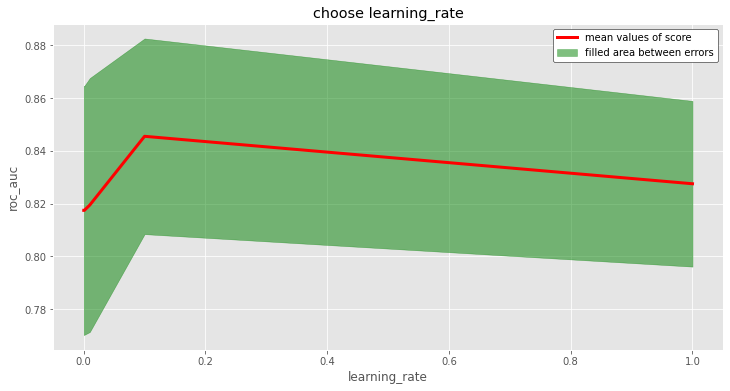

In [42]:
params = {}
params['n_estimators'] = 50
params['loss_function'] = 'Logloss'
params['eval_metric'] = 'AUC'
params['random_seed'] = 0
params['learning_rate'] = 0.01

scores = catboostCV(train.iloc[:, :-1], y, params, tuned_param = 'learning_rate', grid = [1, 0.1, 0.01, 0.001, 0.0001])
print(scores)


[[8.19457130e-01 2.40371798e-02 4.60000000e+01]
 [8.44296395e-01 1.91558713e-02 4.90000000e+01]
 [8.44915807e-01 1.74688845e-02 4.90000000e+01]
 [8.44696882e-01 1.70844604e-02 4.70000000e+01]
 [8.43352853e-01 1.70867238e-02 2.90000000e+01]]


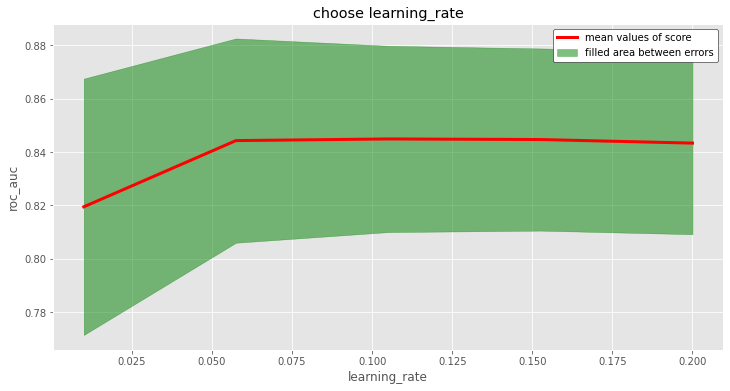

In [43]:
# уточним оптимальный learning_rate

scores = catboostCV(train.iloc[:, :-1], y, params, tuned_param = 'learning_rate', grid = np.linspace(0.01, 0.2, 5))
print(scores)

### Подберем оптимальную глубину деревьев


[[8.45445826e-01 1.66959956e-02 4.90000000e+01]
 [8.46575159e-01 1.76054679e-02 4.90000000e+01]
 [8.46964902e-01 1.79343443e-02 4.60000000e+01]
 [8.45718257e-01 1.70310438e-02 4.80000000e+01]
 [8.44936362e-01 1.82905981e-02 4.90000000e+01]
 [8.43352853e-01 1.70867238e-02 2.90000000e+01]
 [8.41713382e-01 1.62291865e-02 2.80000000e+01]
 [8.41452585e-01 1.55681309e-02 2.10000000e+01]
 [8.40095027e-01 2.04209410e-02 1.20000000e+01]
 [8.36077117e-01 1.64734222e-02 1.50000000e+01]]


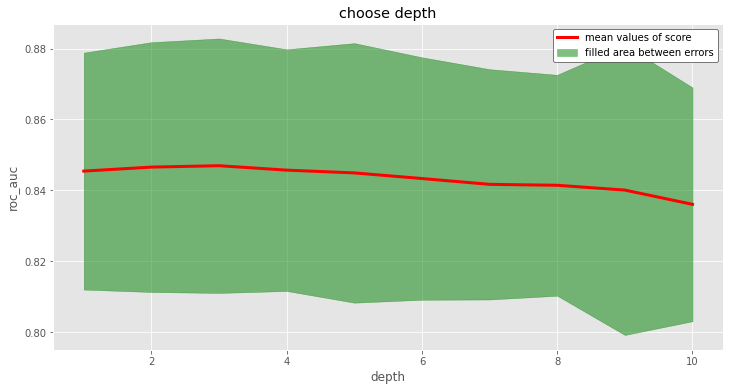

In [44]:
scores = catboostCV(train.iloc[:, :-1], y, params, tuned_param = 'depth', grid = np.arange(1, 11))
print(scores)

### Оценим оптимальное число деревьев при найденных выше параметрах


In [45]:
params = {}
params['depth'] = 3
params['learning_rate'] = 0.1
params['loss_function'] = 'Logloss'
params['eval_metric'] = 'AUC'
params['random_seed'] = 0
params['n_estimators'] = 300

cv_scores = cv(
    params = params,
    pool = Pool(train.iloc[:, :-1], label=y, cat_features=cat_cols),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=True,
    verbose=1)

best_value = np.max(cv_scores['test-AUC-mean'])
best_iter = np.argmax(cv_scores['test-AUC-mean'])
std = cv_scores['test-AUC-std'][best_iter]

0:	test: 0.7364697	best: 0.7364697 (0)	total: 156ms	remaining: 46.6s
1:	test: 0.7884296	best: 0.7884296 (1)	total: 298ms	remaining: 44.5s
2:	test: 0.8040586	best: 0.8040586 (2)	total: 451ms	remaining: 44.7s
3:	test: 0.8108933	best: 0.8108933 (3)	total: 599ms	remaining: 44.3s
4:	test: 0.8142887	best: 0.8142887 (4)	total: 740ms	remaining: 43.6s
5:	test: 0.8185130	best: 0.8185130 (5)	total: 885ms	remaining: 43.3s
6:	test: 0.8239994	best: 0.8239994 (6)	total: 1.04s	remaining: 43.5s
7:	test: 0.8273881	best: 0.8273881 (7)	total: 1.18s	remaining: 43s
8:	test: 0.8308287	best: 0.8308287 (8)	total: 1.32s	remaining: 42.8s
9:	test: 0.8324330	best: 0.8324330 (9)	total: 1.46s	remaining: 42.4s
10:	test: 0.8337674	best: 0.8337674 (10)	total: 1.61s	remaining: 42.3s
11:	test: 0.8346591	best: 0.8346591 (11)	total: 1.75s	remaining: 41.9s
12:	test: 0.8360353	best: 0.8360353 (12)	total: 1.89s	remaining: 41.8s
13:	test: 0.8368469	best: 0.8368469 (13)	total: 2.03s	remaining: 41.4s
14:	test: 0.8377156	best: 0.

best_value =  0.8474558742734268
best_iter =  146


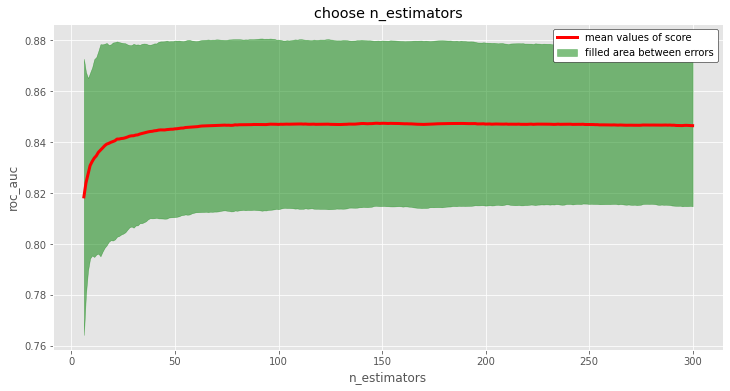

In [48]:
plt.figure(figsize=(12,6))
plt.title('choose {}'.format('n_estimators'))

plt.plot(np.arange(6,301), cv_scores['test-AUC-mean'][5:], label='mean values of score', color='red', lw=3)
plt.fill_between(np.arange(6,301), cv_scores['test-AUC-mean'][5:] - 2 * cv_scores['test-AUC-std'][5:], cv_scores['test-AUC-mean'][5:] + 2 * cv_scores['test-AUC-std'][5:], 
                  color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')

print('best_value = ', np.max(cv_scores['test-AUC-mean']))
print('best_iter = ', np.argmax(cv_scores['test-AUC-mean']))

## Засабмитим лучшую модель

In [49]:
best_model = catboost.CatBoostClassifier(n_estimators=146,
                                             depth = 3,
                                             learning_rate = 0.1,
                                             cat_features=cat_cols,
                                             random_state=0, 
                                             auto_class_weights = 'Balanced',
                                             custom_metric = 'AUC',
                                             eval_metric = 'AUC',
                                             verbose = 1)

best_model.fit(train.iloc[:, :-1], y)

0:	total: 5.56ms	remaining: 806ms
1:	total: 9.09ms	remaining: 655ms
2:	total: 13.3ms	remaining: 633ms
3:	total: 15.7ms	remaining: 556ms
4:	total: 19.7ms	remaining: 555ms
5:	total: 23ms	remaining: 536ms
6:	total: 26.1ms	remaining: 519ms
7:	total: 30ms	remaining: 517ms
8:	total: 33ms	remaining: 503ms
9:	total: 36.3ms	remaining: 493ms
10:	total: 39.5ms	remaining: 485ms
11:	total: 42.8ms	remaining: 478ms
12:	total: 45.9ms	remaining: 470ms
13:	total: 49.1ms	remaining: 463ms
14:	total: 52.2ms	remaining: 456ms
15:	total: 55.2ms	remaining: 448ms
16:	total: 58.2ms	remaining: 442ms
17:	total: 61.2ms	remaining: 435ms
18:	total: 64.3ms	remaining: 430ms
19:	total: 67.3ms	remaining: 424ms
20:	total: 70.2ms	remaining: 418ms
21:	total: 73.3ms	remaining: 413ms
22:	total: 76.4ms	remaining: 408ms
23:	total: 79.3ms	remaining: 403ms
24:	total: 82.4ms	remaining: 399ms
25:	total: 85.4ms	remaining: 394ms
26:	total: 88.3ms	remaining: 389ms
27:	total: 91.3ms	remaining: 385ms
28:	total: 94.4ms	remaining: 381ms
2

In [51]:
#важность признаков 

best_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,HasContractPhone,36.725947
1,MonthlySpending,14.950258
2,ClientPeriod,14.015413
3,HasOnlineSecurityService,9.962895
4,TotalSpent,5.557820
5,HasTechSupportAccess,4.300674
6,PaymentMethod,3.226619
7,IsBillingPaperless,2.799323
8,HasInternetService,1.915324
9,HasMultiplePhoneNumbers,1.372686


In [ ]:
subm = pd.DataFrame({'ID': test.index, 'Churn': best_model.predict_proba(test)[:,1]})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/catboost_bestmodel.csv', index=False)

## Public Score = 0.85307



## Попробуем еще улучшить результат, обучив 100 моделей на разных сплитах,  выберем 30 лучших по валидации и усредним их ответ

чтобы снизить смещение, для валидации оставим 10% выборки.

In [52]:
grid = np.arange(141,151)
models = []

for seed in tqdm(range(100)):
    X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, :-1], y, stratify = y,
                                      train_size=0.9, 
                                      random_state=seed)
    
    boosting_model = catboost.CatBoostClassifier(n_estimators = 146, 
                                                  learning_rate = 0.1, 
                                                  depth = 3, 
                                                  cat_features=cat_cols,
                                                  random_state=seed,  
                                                  auto_class_weights = 'Balanced',
                                                  eval_metric = 'AUC',
                                                  verbose = 0)
                                                

    boosting_model.fit(X_train, y_train)
    models.append((roc_auc_score(y_val, boosting_model.predict_proba(X_val)[:,1]), boosting_model))

In [53]:
# отсортируем по скору на валидации и построим предсказание по топ-30 моделей
best_models = pd.DataFrame(models).sort_values(by = 0, ascending = False).iloc[:30][1].tolist()

preds = best_models[0].predict_proba(test)[:,1]
for model in best_models[1:]:
  preds += model.predict_proba(test)[:,1]

In [54]:
subm = pd.DataFrame({'ID': test.index, 'Churn': preds/30})
subm.to_csv('/content/drive/My Drive/Colab Notebooks/DLSchool/8.1 ML Pipeline HW/catboost30models09.csv', index=False)

### Public score 0.85294

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Best Model Public Score = 0.85307
(0.8475 - на кросс-валидации)

- n_estimators=146
- depth = 3
- learning_rate = 0.1
- cat_features=cat_cols
- random_state=0
- auto_class_weights = 'Balanced'
- eval_metric = 'AUC'


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.